## Plot mass and radius prediction accuracy of NN

<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_39809/2425272975.py:48: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_ylabel('M ($M_\odot$)')


Using cpu device


/home/dio/miniconda3/lib/python3.12/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


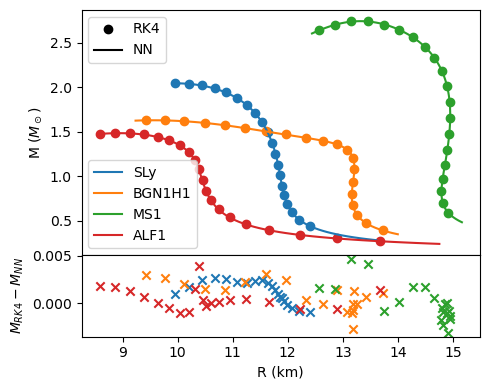


Maximum Percentage Errors for Each EOS:
   EOS  Radius Error (%)  Mass Error (%)
   SLy          0.151878        0.049066
BGN1H1          0.267376        0.097090
   MS1          0.170847        0.022408
  ALF1          0.524866        0.548836


In [1]:
import predictMR as pmr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SLy_param = [ 34.384,  3.005,  2.988,  2.851]
BGN1H1_param= [ 34.623,  3.258,  1.472,  2.464]
MS1_param = [ 34.858,  3.224,  3.033,  1.325]
ALF1_param = [ 34.055,  2.013,  3.389,  2.033]

massrad2_sly = pd.read_csv('mr_RK_sly.csv',usecols=[0, 1])
massrad_sly = pmr.predict_MR_curve(*SLy_param)
denses_array = pd.read_csv('mr_RK_sly.csv', usecols=[2]).to_numpy().flatten()
massrad_sly_res = np.vstack([pmr.MRpredict(np.log(value), *SLy_param) for value in denses_array])
massrad_sly_res=np.array(massrad_sly_res)

massrad2_BGN1H1 = pd.read_csv('mr_RK_bgn1h1.csv',usecols=[0, 1]) 
massrad_BGN1H1 = pmr.predict_MR_curve(*BGN1H1_param)
denses_array = pd.read_csv('mr_RK_bgn1h1.csv', usecols=[2]).to_numpy().flatten()
massrad_BGN1H1_res = np.vstack([pmr.MRpredict(np.log(value), *BGN1H1_param) for value in denses_array])
massrad_BGN1H1_res=np.array(massrad_BGN1H1_res)


massrad2_MS1 = pd.read_csv('mr_RK_ms1.csv', usecols=[0, 1])
massrad_MS1 = pmr.predict_MR_curve(*MS1_param)
denses_array_MS1 = pd.read_csv('mr_RK_ms1.csv', usecols=[2]).to_numpy().flatten()
massrad_MS1_res = np.vstack([pmr.MRpredict(np.log(value), *MS1_param) for value in denses_array_MS1])
massrad_MS1_res = np.array(massrad_MS1_res)


massrad2_ALF1 = pd.read_csv('mr_RK_alf1.csv', usecols=[0, 1])
massrad_ALF1 = pmr.predict_MR_curve(*ALF1_param)
denses_array_ALF1 = pd.read_csv('mr_RK_alf1.csv', usecols=[2]).to_numpy().flatten()
massrad_ALF1_res = np.vstack([pmr.MRpredict(np.log(value), *ALF1_param) for value in denses_array_ALF1])
massrad_ALF1_res = np.array(massrad_ALF1_res)

fig = plt.figure(figsize=(5, 4))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0)
ax1 = fig.add_subplot(gs[0])
ax1.plot(massrad_sly[1]/1000, massrad_sly[0], label='SLy')
ax1.scatter(massrad2_sly['1']/1000, massrad2_sly['0'])
ax1.plot(massrad_BGN1H1[1]/1000, massrad_BGN1H1[0], label='BGN1H1')
ax1.scatter(massrad2_BGN1H1['1']/1000, massrad2_BGN1H1['0'])
ax1.plot(massrad_MS1[1]/1000, massrad_MS1[0], label='MS1')
ax1.scatter(massrad2_MS1['1']/1000, massrad2_MS1['0'])
ax1.plot(massrad_ALF1[1]/1000, massrad_ALF1[0], label='ALF1')
ax1.scatter(massrad2_ALF1['1']/1000, massrad2_ALF1['0'])
ax1.set_ylabel('M ($M_\odot$)')
ax1.legend()

# Residual plot
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.scatter(massrad2_sly['1']/1000, massrad2_sly['0']-massrad_sly_res[:,0],marker='x')
ax2.scatter(massrad2_BGN1H1['1']/1000, massrad2_BGN1H1['0']-massrad_BGN1H1_res[:,0],marker='x')
ax2.scatter(massrad2_MS1['1']/1000, massrad2_MS1['0'] - massrad_MS1_res[:, 0],marker='x')
ax2.scatter(massrad2_ALF1['1']/1000, massrad2_ALF1['0'] - massrad_ALF1_res[:, 0],marker='x')
ax2.plot([], [], 'o', label='RK4', color='k')
ax2.plot([], [], '-', label='NN',color='k')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 4))
ax2.set_xlabel('R (km)')
ax2.set_ylabel(r'$M_{RK4} - M_{NN}$')
# Hide x labels and tick labels for the first plot
plt.setp(ax1.get_xticklabels(), visible=False)
plt.tight_layout()
plt.savefig('predictionprogress_perEoS.pdf')
plt.show()
plt.close()

MS1_radius_maxerr = np.max((massrad2_MS1['0'] - massrad_MS1_res[:, 0]) / massrad2_MS1['0'] * 100)
ALF1_radius_maxerr = np.max((massrad2_ALF1['0'] - massrad_ALF1_res[:, 0]) / massrad2_ALF1['0'] * 100)
BGN1H1_radius_maxerr = np.max((massrad2_BGN1H1['0'] - massrad_BGN1H1_res[:, 0]) / massrad2_BGN1H1['0'] * 100)
sly_radius_maxerr = np.max((massrad2_sly['0'] - massrad_sly_res[:, 0]) / massrad2_sly['0'] * 100)

MS1_mass_maxerr = np.max((massrad2_MS1['1'] - massrad_MS1_res[:, 1]) / massrad2_MS1['1'] * 100)
ALF1_mass_maxerr = np.max((massrad2_ALF1['1'] - massrad_ALF1_res[:, 1]) / massrad2_ALF1['1'] * 100)
BGN1H1_mass_maxerr = np.max((massrad2_BGN1H1['1'] - massrad_BGN1H1_res[:, 1]) / massrad2_BGN1H1['1'] * 100)
sly_mass_maxerr = np.max((massrad2_sly['1'] - massrad_sly_res[:, 1]) / massrad2_sly['1'] * 100)


data = {
    "EOS": ["SLy", "BGN1H1", "MS1", "ALF1"],
    "Radius Error (%)": [sly_radius_maxerr, BGN1H1_radius_maxerr, MS1_radius_maxerr, ALF1_radius_maxerr],
    "Mass Error (%)": [sly_mass_maxerr, BGN1H1_mass_maxerr, MS1_mass_maxerr, ALF1_mass_maxerr]
}


error_df = pd.DataFrame(data)
print("\nMaximum Percentage Errors for Each EOS:")
print(error_df.to_string(index=False))

## Single-core performance test

In [2]:
import timeit
import random
import statistics
def wrapper():
    p0 = random.uniform(33.9, 34.9)
    G1 = random.uniform(2.2, 4.07)
    G2 = random.uniform(1.2, 3.8)
    G3 = random.uniform(1.3, 3.6)
    return pmr.predict_MR_curve(p0, G1, G2, G3)


number_of_runs = 100000
execution_times = []
for _ in range(number_of_runs):
    exec_time = timeit.timeit(wrapper, number=1)
    execution_times.append(exec_time)

average_time = statistics.mean(execution_times)
std_dev_time = statistics.stdev(execution_times)
print(f"Average execution time: {average_time:.6f} seconds")
print(f"Standard deviation: {std_dev_time:.6f} seconds")


Average execution time: 0.000556 seconds
Standard deviation: 0.000233 seconds


## Multicore performance test

With 1 cores - Average: 0.000514 s, Std Dev: 0.000228 s, Total Time: 0.788058 s
With 2 cores - Average: 0.000586 s, Std Dev: 0.000251 s, Total Time: 0.714166 s
With 3 cores - Average: 0.000577 s, Std Dev: 0.000682 s, Total Time: 0.466600 s
With 4 cores - Average: 0.000687 s, Std Dev: 0.001273 s, Total Time: 0.484691 s
With 5 cores - Average: 0.001171 s, Std Dev: 0.002703 s, Total Time: 0.675431 s
With 6 cores - Average: 0.001565 s, Std Dev: 0.003287 s, Total Time: 0.842346 s
With 7 cores - Average: 0.001673 s, Std Dev: 0.004555 s, Total Time: 0.852203 s
With 8 cores - Average: 0.003298 s, Std Dev: 0.007424 s, Total Time: 1.065194 s
With 9 cores - Average: 0.002861 s, Std Dev: 0.007738 s, Total Time: 1.267929 s
With 10 cores - Average: 0.003323 s, Std Dev: 0.008718 s, Total Time: 0.972655 s
With 11 cores - Average: 0.004285 s, Std Dev: 0.011942 s, Total Time: 0.948472 s
With 12 cores - Average: 0.003099 s, Std Dev: 0.009937 s, Total Time: 0.857120 s


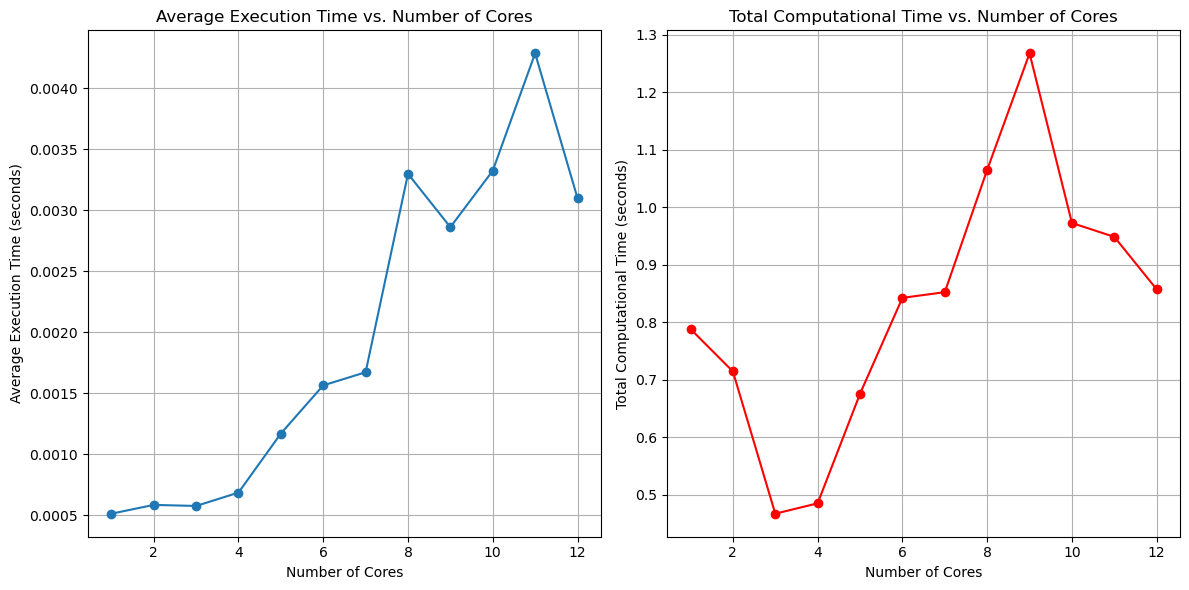

In [3]:
import concurrent.futures
import random
import statistics
import matplotlib.pyplot as plt
import multiprocessing
import time
import timeit

# Placeholder for pmr module import
# import pmr

def wrapper():
    p0 = random.uniform(33.9, 34.9)
    G1 = random.uniform(2.2, 4.07)
    G2 = random.uniform(1.2, 3.8)
    G3 = random.uniform(1.3, 3.6)
    return pmr.predict_MR_curve(p0, G1, G2, G3)

def measure_time():
    return timeit.timeit(wrapper, number=1)

def test_multi_core_performance(max_cores, number_of_runs):
    cores_list = range(1, max_cores + 1)
    execution_times_per_core = []
    total_computational_time_per_core = []

    for n_cores in cores_list:
        start_time = time.perf_counter()

        with concurrent.futures.ProcessPoolExecutor(max_workers=n_cores) as executor:
            futures = [executor.submit(measure_time) for _ in range(number_of_runs)]
            execution_times = [future.result() for future in concurrent.futures.as_completed(futures)]

        end_time = time.perf_counter()
        total_time = end_time - start_time

        average_time = statistics.mean(execution_times)
        std_dev_time = statistics.stdev(execution_times)
        execution_times_per_core.append(average_time)
        total_computational_time_per_core.append(total_time)

        print(f"With {n_cores} cores - Average: {average_time:.6f} s, Std Dev: {std_dev_time:.6f} s, Total Time: {total_time:.6f} s")

    return cores_list, execution_times_per_core, total_computational_time_per_core

if __name__ == "__main__":
    max_cores = multiprocessing.cpu_count()
    number_of_runs = 1000

    cores_list, execution_times_per_core, total_computational_time_per_core = test_multi_core_performance(max_cores, number_of_runs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(cores_list, execution_times_per_core, marker='o')
    plt.title('Average Execution Time vs. Number of Cores')
    plt.xlabel('Number of Cores')
    plt.ylabel('Average Execution Time (seconds)')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(cores_list, total_computational_time_per_core, marker='o', color='r')
    plt.title('Total Computational Time vs. Number of Cores')
    plt.xlabel('Number of Cores')
    plt.ylabel('Total Computational Time (seconds)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


## Use case: Likelihood calculation

In [8]:
# system functions that are always useful to have
import time, sys, os
from multiprocessing import Pool
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

# seed the random number generator
rstate= np.random.default_rng(56101)
# re-defining plotting defaults
from matplotlib import rcParams
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'font.size': 30})

import dynesty
from scipy import interpolate
from math import pi
from astropy.io import ascii
from scipy.interpolate import interp1d
from scipy import optimize
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


nsdata= pd.read_csv("nsmassrad.txt")
obj_names = nsdata['name']
R_nicer,dR_nicer= nsdata['radius'], nsdata['eRad']
M_nicer,dM_nicer = nsdata['mass'],nsdata['eMass']
print("Used data:")
print(nsdata)
print("See our publication for data reference")
from math import erf
import warnings

def loglike(params, plot=False):
    #likehood
    warnings.filterwarnings("ignore", category=RuntimeWarning) 
    p0, G1, G2, G3 = params
#     print(params)
    calcMR = pmr.predict_MR_curve(p0, G1, G2, G3, True)
    Mmax_idx = calcMR[0].idxmax()
    calcMR = calcMR[calcMR[2] < calcMR[2][Mmax_idx]]
    if len(calcMR) > 0 and np.max(calcMR[0])>2.35 and np.max(calcMR[0])<3 :
        n = np.arange(calcMR[1].shape[0])
        n2 = np.linspace(min(n),max(n),10000)
        if plot == True:
            plt.plot(calcMR[1]/1000,calcMR[0])
        Rfromn = interp1d(n, calcMR[1]/1000,kind='cubic')
        Mfromn = interp1d(n, calcMR[0],kind='cubic')
        chi = 0
        for i,Robs in enumerate(R_nicer):
            R_array = Rfromn(n2)
            M_array = Mfromn(n2)
            diff = np.abs(np.power((R_array - Robs),2)/np.power(dR_nicer[i],2) + np.power((M_array - M_nicer[i]),2)/np.power(dM_nicer[i],2))
            closest_n_pos = np.argmin(diff)
            closest_n = n2[closest_n_pos]
            if plot == True:
                plt.scatter(Rfromn(closest_n),Mfromn(closest_n))
            dM2 = np.power(dM_nicer[i],2)
            dR2 = np.power(dR_nicer[i],2)
            chi += -0.5 * np.sum((M_nicer[i] - Mfromn(closest_n))** 2/(dM2) + (R_nicer[i] - Rfromn(closest_n))** 2/(dR2))
        chitotal = chi
        chitotal = np.nan_to_num(chitotal, nan=-np.inf)
    else:
        chitotal = -np.inf
    return chitotal

print("Likelihood: ",loglike([34.85859866255232, 2.254446644682024, 2.8828681081009409, 1.072975725451184]))

p0lim = [33.9, 34.9]
G1lim = [2, 20]
G2lim = [1.1, 6]
G3lim = [1.1, 6]

def prior_transform(utheta):
    up0, uG1,  uG2, uG3 = utheta
    p0= (p0lim[1]-p0lim[0])*up0 + p0lim[0]
    G1= (G1lim[1]-G1lim[0])*uG1 + G1lim[0]
    G2= (G2lim[1]-G2lim[0])*uG2 + G2lim[0]
    G3 = (G3lim[1]-G3lim[0])*uG3 + G3lim[0]
    return p0, G1, G2, G3

Used data:
               name  mass  radius  eMass  eRad
0       4U 1702-429  1.90   12.40   0.30  0.40
1    PSR J0437–4715  1.44   13.60   0.07  0.85
2    HESS J1731-347  0.77   10.40   0.20  0.80
3    PSR J0740+6620  2.08   13.70   0.07  2.05
4  SAX J1748.9-2021  1.70   11.25   0.30  1.78
5              ωCen  1.23    9.80   0.38  1.76
See our publication for data reference
Likelihood:  -105.81268819539456


## Nested sampling run

In [10]:
#run using 10 paralel processes
with dynesty.pool.Pool(10, loglike, prior_transform) as pool:
    dsampler = dynesty.DynamicNestedSampler(pool.loglike, pool.prior_transform, ndim=4,bound='multi', sample='rwalk', rstate=rstate, pool =pool)
    # dsampler =  dynesty.NestedSampler(pool.loglike, pool.prior_transform, ndim=4,sample='unif', rstate=rstate, pool =pool)
    dsampler.run_nested(dlogz_init=0.005)#dlogz_init=0.005)

dres = dsampler.results

13125it [12:09, 17.98it/s, batch: 8 | bound: 2 | nc: 1 | ncall: 171709 | eff(%):  7.644 | loglstar:   -inf < -2.769 < -3.367 | logz: -5.653 +/-  0.036 | stop:  0.981]          


## Parameter posterior

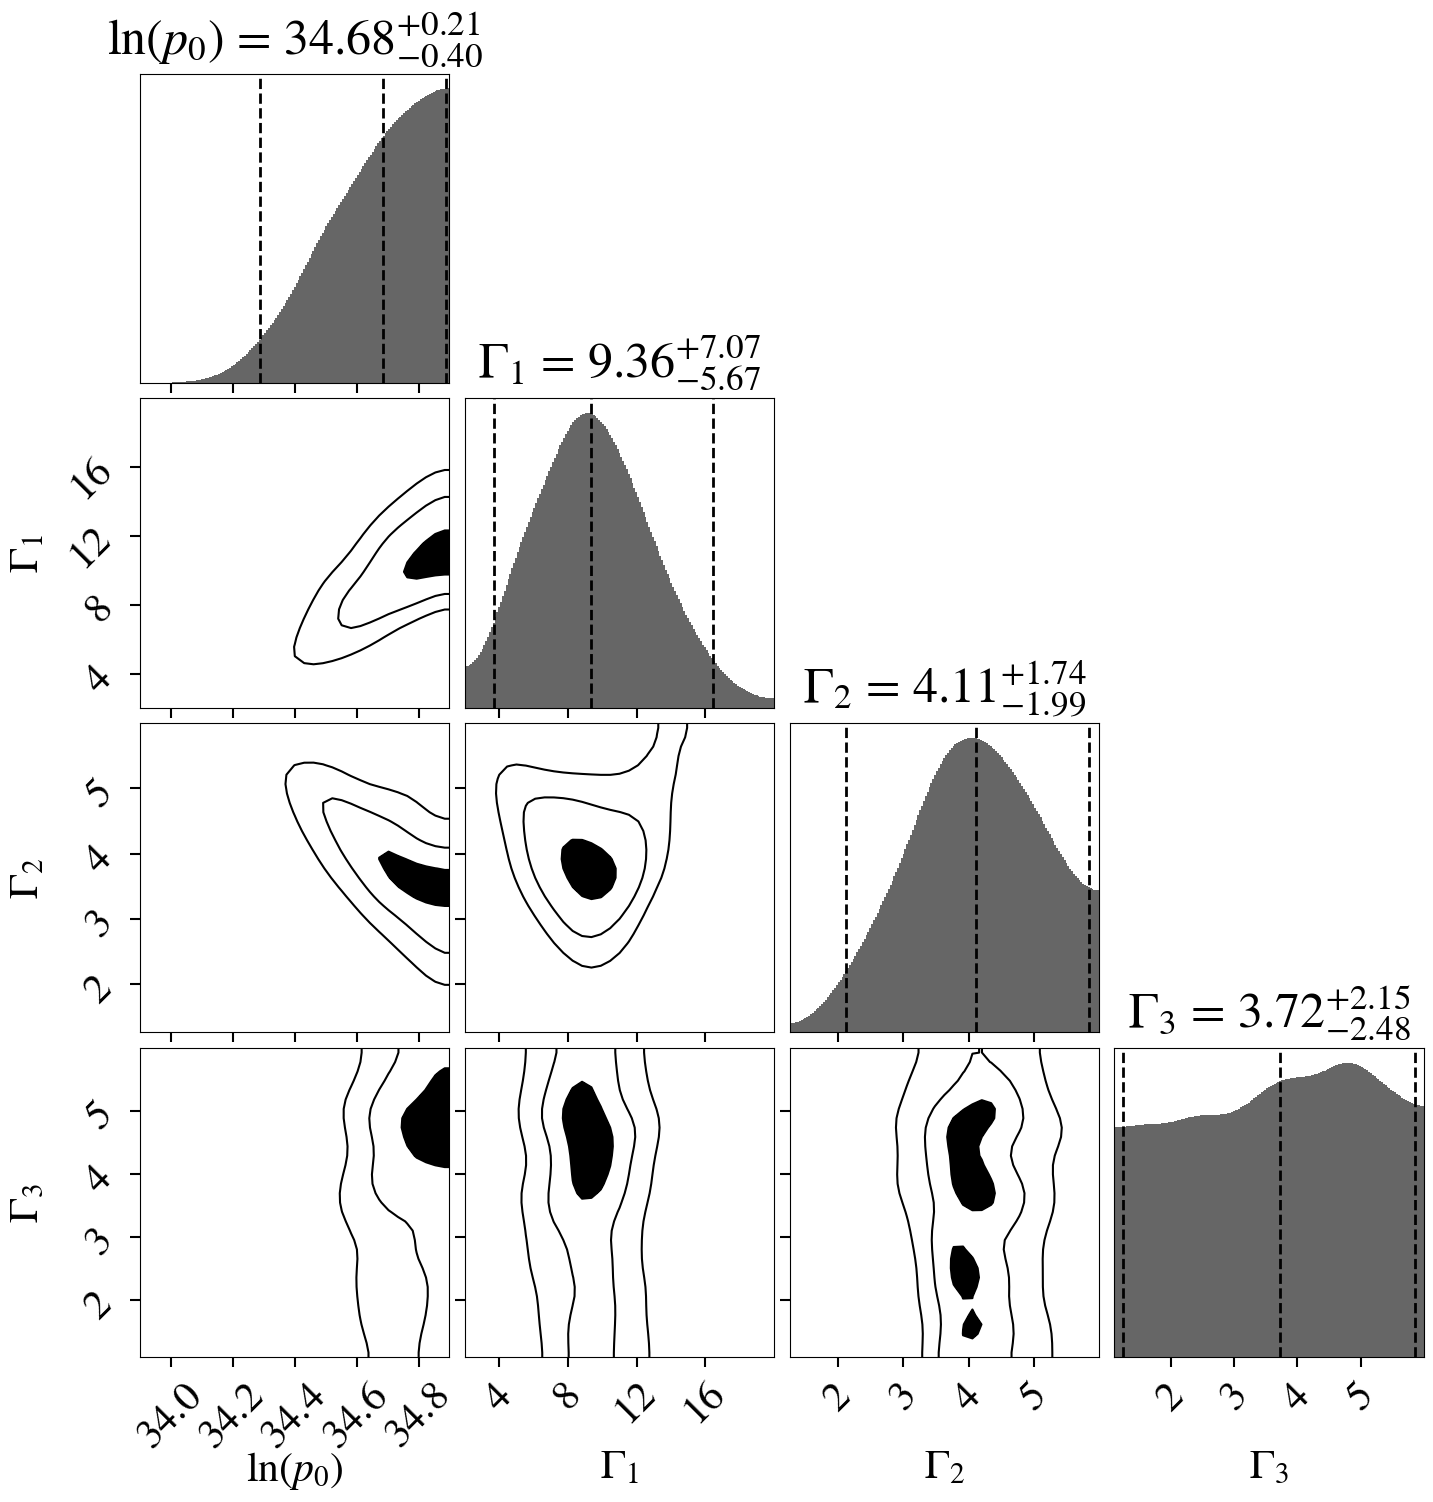

In [11]:
from dynesty import plotting as dyplot
labels = [r'$\ln(p_0)$', r'$\Gamma_1$', r'$\Gamma_2$',r'$\Gamma_3$']
fig, axes = dyplot.cornerplot(dres, show_titles=True, color='black',smooth=0.06,quantiles_2d=[0.1, 0.4, 0.68],
                              title_kwargs={'y': 1.04}, labels=labels,
                              fig=plt.subplots(4, 4, figsize=(15, 15)),use_math_text=True )
plt.savefig('posterior_dist.pdf',bbox_inches='tight')
plt.show()

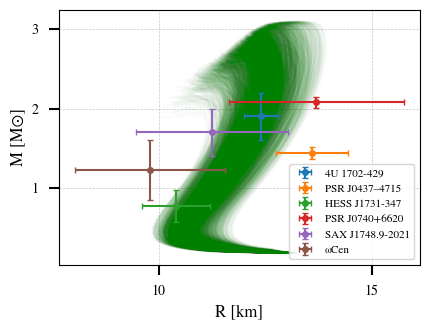

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.close()
# Plot PPC for one sigma quantile
from dynesty import utils as dyfunc
plt.figure(figsize=(5, 4))
samples, weights = dres.samples, dres.importance_weights()

n_variables = samples.shape[1]

# Determine max length of filtered samples
max_length = max(len(samples[:, i][
    (samples[:, i] >= np.quantile(samples[:, i], 0.15865)) &
    (samples[:, i] <= np.quantile(samples[:, i], 0.84135))
]) for i in range(n_variables))

filtered_samples_array = np.full((max_length, n_variables), np.nan)

for i in range(n_variables):
    variable = samples[:, i]
    lower_bound, upper_bound = np.quantile(variable, [0.15865, 0.84135])
    filtered_samples_array[:len(variable[(variable >= lower_bound) & (variable <= upper_bound)]), i] = variable[
        (variable >= lower_bound) & (variable <= upper_bound)
    ]

# Resample 1000 points from filtered samples
sample_indices = np.random.choice(filtered_samples_array.shape[0], 5000, replace=False)
samples_resampled = filtered_samples_array[sample_indices]

# Plot predictions for resampled points
for i in range(len(samples_resampled)):
    massradp = pmr.predict_MR_curve(samples_resampled[i, 0], samples_resampled[i, 1], samples_resampled[i, 2], samples_resampled[i, 3])
    plt.plot(massradp[1]/1000, massradp[0], color='g', alpha=0.01)


# Plot error bars with randomized colors for R_nicer, M_nicer
color_cycle = plt.cm.tab10.colors
for i in range(len(R_nicer)):
    color = color_cycle[i % len(color_cycle)]  # Cycle through the colors
    plt.errorbar(R_nicer[i], M_nicer[i], xerr=dR_nicer[i], yerr=dM_nicer[i], 
                 label=obj_names[i], fmt="o", markersize=4, color=color,capsize=2)

plt.xlabel('R [km]', fontsize=12)
plt.ylabel('M [M⊙]', fontsize=12)
plt.legend(fontsize=8, loc='lower right')

# Customize ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.tight_layout()  # Adjust layout for better fitting
plt.savefig('PPC.pdf',bbox_inches='tight')
plt.show()
